In [1]:
#Load in the dataset
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('cirrhosis.csv')
df.tail()



,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [2]:
#Datatypes
print(df.dtypes)


ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [3]:
#Percent M/F
females = len(df[df['Sex'] == 'F'])
males = len(df[df['Sex'] == 'M'])
total = len(df)
print(males/total) #11% males
print(females/total) #89% females

0.10526315789473684
0.8947368421052632


In [4]:
#missing values -- Drug, Ascites, Hepatomology, Spiders, Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values > 0:
        print(col, (missing_values/len(df[col])), 'missing values')

print('12 out of', len(df.columns), 'columns have missing values')

Drug 0.2535885167464115 missing values
Ascites 0.2535885167464115 missing values
Hepatomegaly 0.2535885167464115 missing values
Spiders 0.2535885167464115 missing values
Cholesterol 0.32057416267942584 missing values
Copper 0.2583732057416268 missing values
Alk_Phos 0.2535885167464115 missing values
SGOT 0.2535885167464115 missing values
Tryglicerides 0.3253588516746411 missing values
Platelets 0.02631578947368421 missing values
Prothrombin 0.004784688995215311 missing values
Stage 0.014354066985645933 missing values
12 out of 20 columns have missing values


In [5]:
#Exploring the target variable
print(df['Status'].value_counts())

Status
C     232
D     161
CL     25
Name: count, dtype: int64


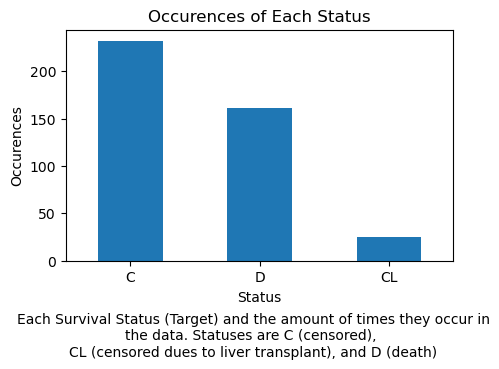

In [6]:
#Status (Target) -- categorical
plt.figure(figsize=(5,3))
pd.value_counts(df['Status']).plot.bar()
plt.title('Occurences of Each Status')
plt.ylabel('Occurences')
plt.xlabel('Status')
txt='''Each Survival Status (Target) and the amount of times they occur in the data. Statuses are C (censored), 
CL (censored dues to liver transplant), and D (death)'''
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.xticks(rotation=360)
plt.show()

In [7]:
#Stage -- Ordinal
pd.value_counts(df['Stage'])

Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [8]:
df_correct_order = df
correct_order = [1, 2, 3, 4]

pd.value_counts(df_correct_order['Stage']).reindex(correct_order)

Stage
1     21
2     92
3    155
4    144
Name: count, dtype: int64

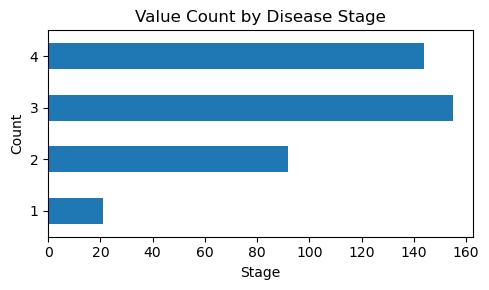

In [9]:
plt.figure(figsize=(5,3))

pd.value_counts(df_correct_order['Stage']).reindex(correct_order).plot.barh()
plt.ylabel('Count')
plt.xlabel('Stage')
plt.title('Value Count by Disease Stage')
plt.tight_layout()
plt.show()

In [10]:
#Platelets -- Continuous
print(df['Platelets'].describe())

count    407.000000
mean     257.024570
std       98.325585
min       62.000000
25%      188.500000
50%      251.000000
75%      318.000000
max      721.000000
Name: Platelets, dtype: float64


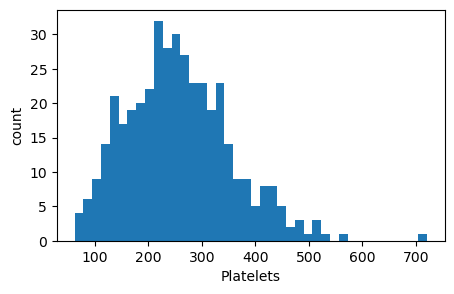

In [11]:
plt.figure(figsize=(5,3))

df['Platelets'].plot.hist(bins = int(2 * np.sqrt(df.shape[0])))
plt.xlabel('Platelets')
plt.ylabel('count')
plt.show()

In [12]:
#Continuous vs. Categorical -- stacked bar plot
count_matrix = df.groupby(['Ascites', 'Status']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important -- no instance of CL and Y


Status       C    CL      D
Ascites                    
N        167.0  19.0  102.0
Y          1.0   NaN   23.0
Status          C        CL         D
Ascites                              
N        0.579861  0.065972  0.354167
Y        0.041667       NaN  0.958333


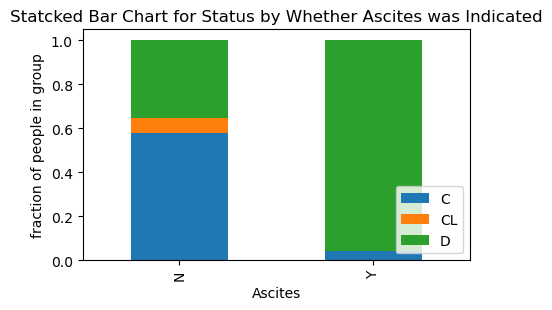

In [13]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Ascites was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [14]:
count_matrix = df.groupby(['Hepatomegaly', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status               C        CL         D
Hepatomegaly                              
N             0.710526  0.046053  0.243421
Y             0.375000  0.075000  0.550000


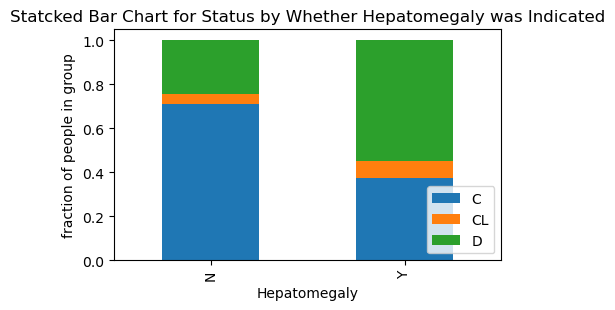

In [15]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Hepatomegaly was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [16]:
count_matrix = df.groupby(['Spiders', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) 

Status          C        CL         D
Spiders                              
N        0.608108  0.063063  0.328829
Y        0.366667  0.055556  0.577778


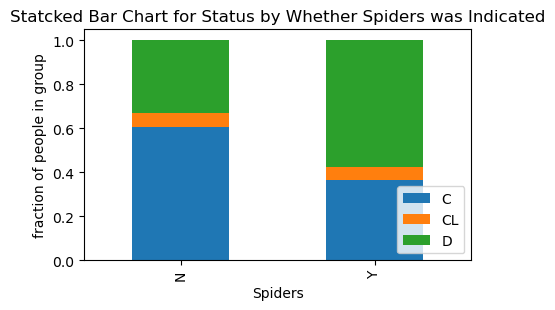

In [17]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.title('Statcked Bar Chart for Status by Whether Spiders was Indicated')
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [18]:
count_matrix = df.groupby(['Edema', 'Status']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm) #important that there are no instances of CL and Y

Status         C        CL         D
Edema                               
N       0.610169  0.062147  0.327684
S       0.340909  0.068182  0.590909
Y       0.050000       NaN  0.950000


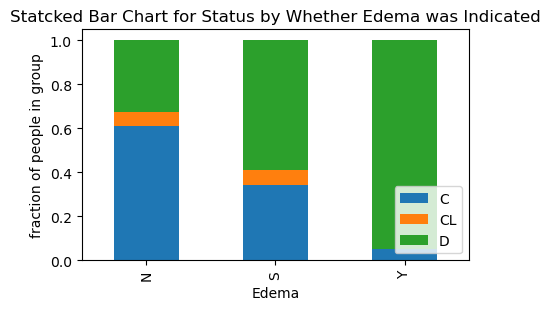

In [19]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.title('Statcked Bar Chart for Status by Whether Edema was Indicated')
plt.legend(loc=4)
plt.show()

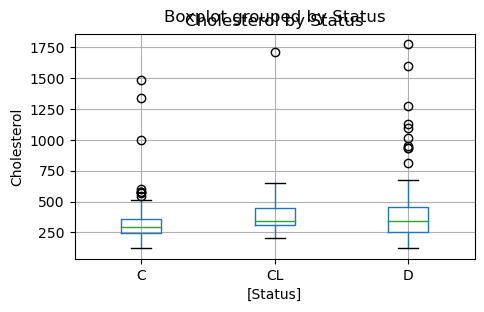

In [20]:
#Continuous vs. Categorical -- hist, box plot, violin
#avoided a category-specific histogram because the target variable has 3 categories
#Billrubin
df[['Cholesterol','Status']].boxplot(by='Status',figsize=(5,3))
plt.ylabel('Cholesterol')
plt.title('Cholesterol by Status')
plt.show() 

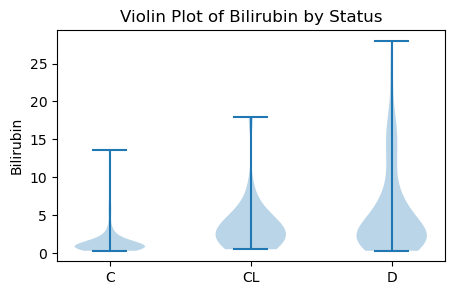

In [21]:
#Violin Plot for Bilirubin
dataset = [df[df['Status']=='C']['Bilirubin'].values,
           df[df['Status']=='CL']['Bilirubin'].values, 
           df[df['Status']=='D']['Bilirubin'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['C','CL', 'D'])
plt.ylabel('Bilirubin')
plt.title('Violin Plot of Bilirubin by Status')
plt.show()

In [22]:
#Testing the outputs of splitting -- since the data is iid, we can use regular 60,20,20 split, but only 25 CL, so we need to use Stratified Kfolds
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)

# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 


X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))


kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))


test balance: (array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  97]))
(array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  96]))
(array([0, 1, 2]), array([46,  5, 33]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))


In [23]:
#Check that the lengths of the groups are correct
print(len(X_train))
print(len(X_test))
print(len(X_val))

251
84
83


In [24]:
X_train['Stage'].unique()

array([ 3.,  2.,  4., nan,  1.])

In [25]:
df.tail()

,N_Days,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,681,2,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,0,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,0,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,0,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,976,0,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [26]:
df['Stage'].unique()

array([ 4.,  3.,  2.,  1., nan])

In [27]:
#Examining the output of preprocessing the data without dealing with missing values

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(df_test.shape)


(251, 26)
(83, 26)
(84, 26)


In [28]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (251, 26)
fraction of missing values in features:
num__Cholesterol      0.290837
num__Copper           0.231076
num__Alk_Phos         0.223108
num__SGOT             0.223108
num__Tryglicerides    0.294821
num__Platelets        0.027888
ord__Stage            0.011952
dtype: float64
fraction of points with missing values: 0.30677290836653387


In [29]:
mask = df_test[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets']].isnull()

unique_rows, counts = np.unique(mask, axis=0,return_counts=True)
print(unique_rows.shape) # 6 patterns, we will train 6 models
for i in range(len(counts)):
    print(unique_rows[i],counts[i])

#Only 6 groupings so can def use this! May be a way to increase model accuracy

(6, 6)
[False False False False False False] 47
[False False False False False  True] 1
[False False False False  True False] 1
[ True False False False  True False] 5
[ True  True  True  True  True False] 29
[ True  True  True  True  True  True] 1


In [40]:
#Now we want to test what the preprocessed data would look like if we used Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Specify the column and drop rows with NaN in that column
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))


kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))


#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# one-hot encoder -- categorical
# Make the missing values categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    # ('ordinal', OrdinalEncoder(categories = ordinal_cats, handle_unknown='error'))
    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=42), max_iter=20,random_state=42))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print(df_test.shape)



test balance: (array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([138,  15,  97]))
(array([0, 1, 2]), array([47,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  96]))
(array([0, 1, 2]), array([46,  5, 33]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
new fold
(array([0, 1, 2]), array([139,  15,  97]))
(array([0, 1, 2]), array([46,  5, 32]))
(251, 26)
(83, 26)
(84, 26)


/Users/alexweitzman/anaconda3/envs/data1030_envir/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [32]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (251, 26)
fraction of missing values in features:
ord__Stage    0.011952
dtype: float64
fraction of points with missing values: 0.01195219123505976


In [33]:

print(df_train[['num__Cholesterol','num__Copper','num__Alk_Phos', 'num__SGOT', 'num__Tryglicerides', 'num__Platelets', 'ord__Stage']].tail())

     num__Cholesterol  num__Copper  num__Alk_Phos  num__SGOT  \
246          0.619609     0.109846       4.132692  -0.358540   
247         -0.555868    -1.002221      -0.577644  -0.995654   
248         -0.346326    -0.540831      -0.447138   0.042106   
249         -0.126563    -0.446187      -0.306627   0.956209   
250         -0.566089    -0.564492      -0.373017  -0.989947   

     num__Tryglicerides  num__Platelets  ord__Stage  
246           -0.952619        1.014308         3.0  
247            0.097430        0.483233         1.0  
248           -1.194938        0.789622         1.0  
249            1.571536       -0.201037         2.0  
250           -0.306435       -1.814687         3.0  


In [47]:
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score

#Manipulating the data so that it is prepped for preprocessing
df = pd.read_csv('cirrhosis.csv')
df.tail()

df = df.drop(['ID'], axis=1) #ID is superfluous
df = df.drop(['Drug'], axis=1)
# df = df.replace('NA', np.nan)
column_to_check = 'Stage'
df.dropna(subset=[column_to_check], inplace=True)


# Define the mapping of values to be replaced
replacement_map = {'C': 0, 'CL': 1, 'D': 2}

# Use the replace method to replace values in the specified column
df['Status'] = df['Status'].replace(replacement_map)

random_state = 42

y = df['Status']

X = df.loc[:, df.columns != 'Status'] 

#Now need to process the categorical, ordinal, and numerical variables
ordinal_ftrs = ['Stage'] 
ordinal_cats = [[ 1.,  2.,  3., 4.]]
onehot_ftrs = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
std_ftrs = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


def StratKFoldF1(X, y, ML_Algo, param_grid):
    '''Main function that can be used to train our models, 
    -- preprocesses with StratifiedKFold, 
    -- CV is GridSearchCV
    -- F1 Score as evaluation metric
    '''
    nr_states = 5
    test_scores = []
    final_models = []
    for j in range(20):
        categorical_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
                ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

        # ordinal encoder
        #Make the missing values categories
        ordinal_transformer = Pipeline(steps=[
            ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
            ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

            ])

        # standard scaler
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler()), 
            ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=random_state), max_iter=j, random_state=random_state))])


        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, std_ftrs),
                ('cat', categorical_transformer, onehot_ftrs),
                ('ord', ordinal_transformer, ordinal_ftrs)])
        for i in range(nr_states):
            # first split to separate out the test set
            X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

            # StratifiedKFold to split  other
            kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*i)

            #Under the hood pipeline
            pipe = make_pipeline(preprocessor,ML_Algo)

            #GridSearchCV with StratifiedKFold and f1 as scoring
            grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'f1_weighted',
                                cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
            
            # this line actually fits the model on other
            grid.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
            # save results into a data frame. feel free to print it and inspect it
            results = pd.DataFrame(grid.cv_results_)
            #print(results)

            print('best model parameters:',grid.best_params_)
            print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
            # save the model
            final_models.append(grid)
            # calculate and save the test score
            y_test_pred = final_models[-1].predict(X_test)
            test_scores.append(f1_score(y_test,y_test_pred, average='weighted'))
            # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
            print('test score:',test_scores[i])
        return test_scores, final_models


In [52]:
param_grid = {
        'svc__C': [0.1, 0.5, 1, 5, 10, 100],
        'svc__gamma': [0.1, 1, 10, 100],
    }

clf = SVC(max_iter=10000, random_state=42)

svc_test_scores, svc_final_models = StratKFoldF1(X, y, clf, param_grid)

print('list of test scores:', svc_test_scores)
print('The mean of the test scores is:', np.mean(svc_test_scores))
print('The standard deviation of the test scores is:', np.std(svc_test_scores))

#Best model for f1 is the second one! 


Fitting 6 folds for each of 24 candidates, totalling 144 fits


best model parameters: {'svc__C': 0.5, 'svc__gamma': 0.1}
validation score: 0.7416309135140704
test score: 0.7262406806582488
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'svc__C': 0.5, 'svc__gamma': 0.1}
validation score: 0.6956519034834701
test score: 0.807040362022988
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'svc__C': 0.5, 'svc__gamma': 0.1}
validation score: 0.746362490363377
test score: 0.6916247514329161
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'svc__C': 0.5, 'svc__gamma': 0.1}
validation score: 0.7275872926919833
test score: 0.7208989805375348
Fitting 6 folds for each of 24 candidates, totalling 144 fits
best model parameters: {'svc__C': 0.5, 'svc__gamma': 0.1}
validation score: 0.7173622630972479
test score: 0.7891864487653585
list of test scores: [0.7262406806582488, 0.807040362022988, 0.6916247514329161, 0.7208989805375348, 0.7891864487653585]
The

In [54]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
              'randomforestclassifier__max_depth': [1, 5, 10, 15, 20], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1] # linearly spaced between 0.5 and 1
              } 

clf = RandomForestClassifier(random_state=42)

rf_test_scores, rf_final_models = StratKFoldF1(X, y, clf, param_grid)

print('list of test scores:', rf_test_scores)
print('The mean of the test scores is:', np.mean(rf_test_scores))
print('The standard deviation of the test scores is:', np.std(rf_test_scores))

Fitting 6 folds for each of 30 candidates, totalling 180 fits


best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.7}
validation score: 0.7600843998177513
test score: 0.7176204819277109
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 0.9}
validation score: 0.7296474069949377
test score: 0.8419596754364396
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.7714085250904613
test score: 0.6848334514528701
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.9}
validation score: 0.7510282720014135
test score: 0.748090097510891
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'randomforestclas

In [57]:
from sklearn.linear_model import LogisticRegression
param_grid_lr = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet']
}

clf = LogisticRegression(max_iter=10000, random_state=42)

lr_test_scores, lr_final_models = StratKFoldF1(X, y, clf, param_grid_lr)

print('list of test scores:', lr_test_scores)
print('The mean of the test scores is:', np.mean(lr_test_scores))
print('The standard deviation of the test scores is:', np.std(lr_test_scores))

Fitting 6 folds for each of 21 candidates, totalling 126 fits


best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
validation score: 0.7398811652797601
test score: 0.6995233681980669
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}
validation score: 0.6987873384393768
test score: 0.8557295097610678
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
validation score: 0.7525885696091108
test score: 0.6375215146299484
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
validation score: 0.7395182002707515
test score: 0.730711703117455
Fitting 6 folds for each of 21 candidates, totalling 126 fits
best model parameters: {'logisticregression__C': 1000, 'logisticregression__penalty': 'l2'}
validation score: 0.72735064

In [61]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knc = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 13],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
}

clf_knc = KNeighborsClassifier()

knc_test_scores, knc_best_model = StratKFoldF1(X, y, clf_knc, param_grid_knc)

print('List of test scores:', knc_test_scores)
print('The mean of the test scores is:', np.mean(knc_test_scores))
print('The standard deviation of the test scores is:', np.std(knc_test_scores))

Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.7186701775590665
test score: 0.7535811695981789
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.6815536138627638
test score: 0.7780837636259325
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
validation score: 0.7345163713373303
test score: 0.6802065404475043
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassi

In [64]:
for num in [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2]:
    print(num)

0.0
0.01
0.1
1.0
10.0
100.0


In [68]:
#XGBoost without impution
from xgboost import XGBClassifier

param_grid_xgb = {
    'xgbclassifier__max_depth': [3, 5, 7],
    "xgbclassifier__reg_alpha": [0.01, 0.1, 1, 10, 100],
    "xgbclassifier__reg_lambda": [0.01, 0.1, 1, 10, 100]
}

clf_xgb = XGBClassifier(random_state=42)


nr_states = 5
xgb_test_scores = []
xgb_final_models = []

categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
#Make the missing values categories
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
    ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

    ])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])
for i in range(nr_states):
    # first split to separate out the test set
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

    # StratifiedKFold to split  other
    kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*i)

    #Under the hood pipeline
    pipe = make_pipeline(preprocessor,clf_xgb)

    #GridSearchCV with StratifiedKFold and f1 as scoring
    grid = GridSearchCV(pipe, param_grid=param_grid_xgb,scoring = 'f1_weighted',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    
    # this line actually fits the model on other
    grid.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
    # save results into a data frame. 
    results = pd.DataFrame(grid.cv_results_)
    #print(results)

    print('best model parameters:',grid.best_params_)
    print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
    # save the model
    xgb_final_models.append(grid)
    # calculate and save the test score
    y_test_pred = xgb_final_models[-1].predict(X_test)
    xgb_test_scores.append(f1_score(y_test,y_test_pred, average='weighted'))
    # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
    print('test score:',xgb_test_scores[i])
    
print('List of test scores:', xgb_test_scores)
print('The mean of the test scores is:', np.mean(xgb_test_scores))
print('The standard deviation of the test scores is:', np.std(xgb_test_scores))

Fitting 6 folds for each of 75 candidates, totalling 450 fits
best model parameters: {'xgbclassifier__max_depth': 3, 'xgbclassifier__reg_alpha': 0.1, 'xgbclassifier__reg_lambda': 0.1}
validation score: 0.7778303282710511
test score: 0.7447282865799035
Fitting 6 folds for each of 75 candidates, totalling 450 fits
best model parameters: {'xgbclassifier__max_depth': 5, 'xgbclassifier__reg_alpha': 10, 'xgbclassifier__reg_lambda': 0.1}
validation score: 0.7213360850170307
test score: 0.8294771318282839
Fitting 6 folds for each of 75 candidates, totalling 450 fits
best model parameters: {'xgbclassifier__max_depth': 7, 'xgbclassifier__reg_alpha': 1, 'xgbclassifier__reg_lambda': 0.1}
validation score: 0.7832089144789603
test score: 0.6604241550701738
Fitting 6 folds for each of 75 candidates, totalling 450 fits
best model parameters: {'xgbclassifier__max_depth': 5, 'xgbclassifier__reg_alpha': 10, 'xgbclassifier__reg_lambda': 0.01}
validation score: 0.7373538949861079
test score: 0.768674698795

In [82]:
#Baseline Score for Accuracy and F1
from sklearn.dummy import DummyClassifier

def f_beta_baseline_formula(beta, majority_frac):
    'calculates the baseline f_beta by beta, and fraction of points that belong to the majority class'
    baseline_score = (1 + beta**2)*((1- majority_frac)/((beta**2*(1 - majority_frac)) + 1))
    return baseline_score

f1_baseline_score = []
nr_states = 5
f1_baseline_scores = []
accuracy_baseline_scores = []
for i in range(nr_states):
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42*i)
    print('test balance:',np.unique(y_test,return_counts=True))


    kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*i)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
#building beta = 1
    f1_baseline_score.append(f_beta_baseline_formula(1, (y_train.value_counts().max()/len(y_train))))
print(f1_baseline_score)
    


test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
test balance: (array([0, 1, 2]), array([46,  5, 32]))
[0.611111111111111, 0.611111111111111, 0.614609571788413, 0.611111111111111, 0.611111111111111]


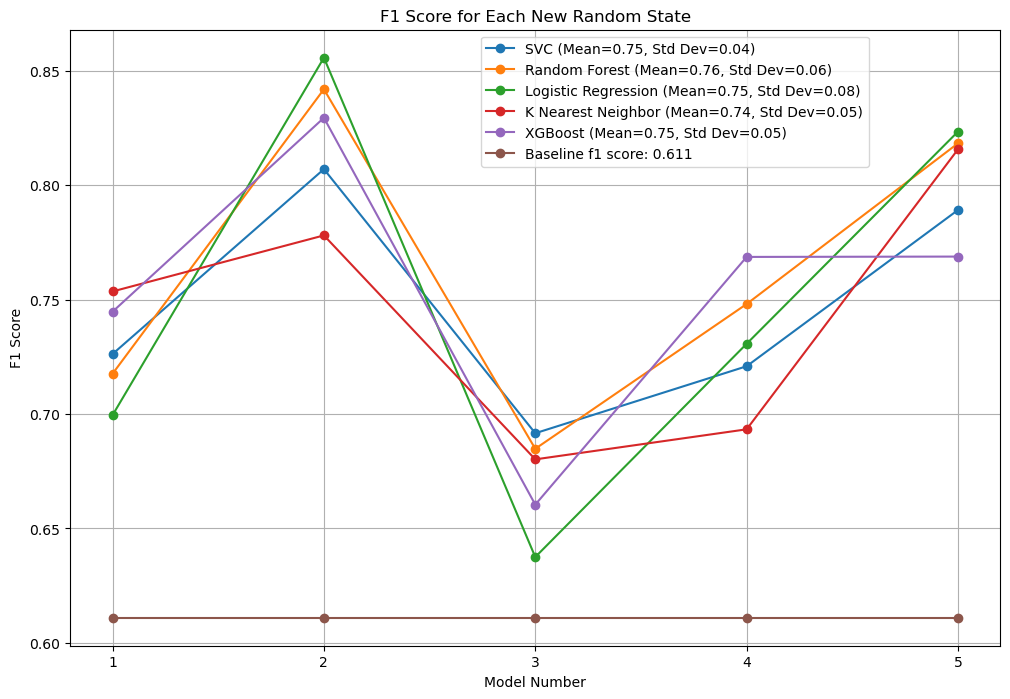

In [95]:
# Plotting

x_values = [1, 2, 3, 4, 5]

mean_std_labels = []
for i, lst in enumerate([svc_test_scores, rf_test_scores, lr_test_scores, knc_test_scores, xgb_test_scores], 1):
    mean_val = np.mean(lst)
    std_val = np.std(lst)
    if i == 1:
        mean_std_labels.append(f'SVC (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 2:
        mean_std_labels.append(f'Random Forest (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 3:
        mean_std_labels.append(f'Logistic Regression (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 4:
        mean_std_labels.append(f'K Nearest Neighbor (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')
    if i == 5:
        mean_std_labels.append(f'XGBoost (Mean={mean_val:.2f}, Std Dev={std_val:.2f})')


f1_baseline_scores = [0.611] * len(x_values)

# Plotting
plt.figure(figsize=(12, 8))  

plt.plot(x_values, svc_test_scores, label=mean_std_labels[0], marker='o')
plt.plot(x_values, rf_test_scores, label=mean_std_labels[1], marker='o')
plt.plot(x_values, lr_test_scores, label=mean_std_labels[2], marker='o')
plt.plot(x_values, knc_test_scores, label=mean_std_labels[3], marker='o')
plt.plot(x_values, xgb_test_scores, label=mean_std_labels[4], marker='o')
plt.plot(x_values, f1_baseline_scores, label='Baseline f1 score: 0.611', marker='o')

plt.xlabel('Model Number')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each New Random State')
plt.legend(loc='upper center', bbox_to_anchor=(0.65, 1))  
plt.xticks(x_values) 

plt.grid(True)
plt.show()

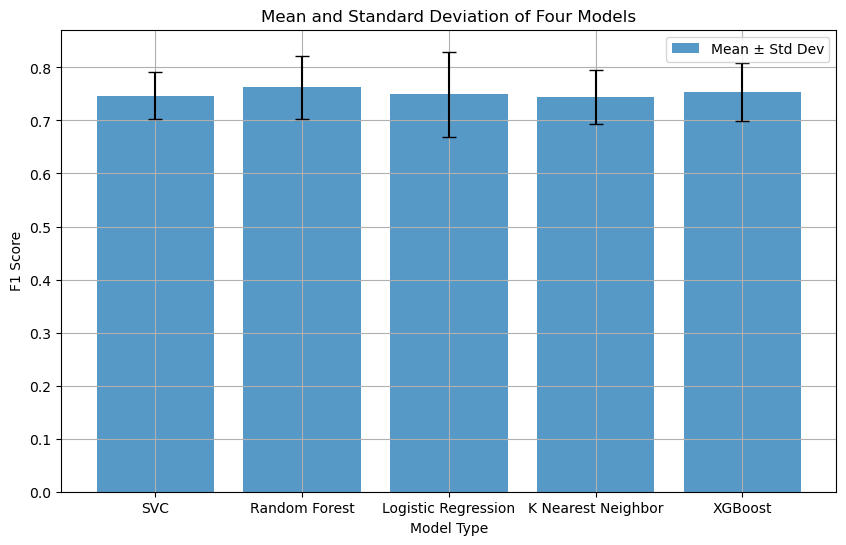

In [97]:
#Plot Averages and Standard Deviations

# Example data
categories = ['SVC', 'Random Forest', 'Logistic Regression', 'K Nearest Neighbor', 'XGBoost']

# Calculate mean and standard deviation for each list
means = [np.mean(lst) for lst in [svc_test_scores, rf_test_scores, lr_test_scores, knc_test_scores, xgb_test_scores]]
std_devs = [np.std(lst) for lst in [svc_test_scores, rf_test_scores, lr_test_scores, knc_test_scores, xgb_test_scores]]

# Plotting
plt.figure(figsize=(10, 6))

# Plot means with error bars representing standard deviations
plt.bar(categories, means, yerr=std_devs, capsize=5, align='center', alpha=0.75, label='Mean ± Std Dev')

plt.xlabel('Model Type')
plt.ylabel('F1 Score')
plt.title('Mean and Standard Deviation of Four Models')

plt.legend()
plt.grid(True)
plt.show()

In [99]:
model = rf_final_models[1]
print(model.best_score_)
print(model.score(X_test,y_test))
print(model.best_params_)

# save the output so I can use it later
import pickle
file = open('Model.save', 'wb')
pickle.dump((model,X_test,y_test),file)
file.close()

0.7296474069949377
0.8419596754364396
{'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 0.9}


In [114]:
import pickle
file = open('Model.save', 'rb')
model, X_test, y_test = pickle.load(file)
file.close()

np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(X.columns),nr_runs])

test_score = model.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == ' <=50K')/len(y_test))
# loop through the features
for i in range(len(X.columns)):
    print('shuffling '+str(X.columns[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[X.columns[i]] = np.random.permutation(X_test[X.columns[i]].values)
        acc_scores.append(model.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.8419596754364396
test baseline =  0.0
shuffling N_Days
   shuffled test score: 0.667 +/- 0.035
shuffling Age
   shuffled test score: 0.814 +/- 0.017
shuffling Sex
   shuffled test score: 0.843 +/- 0.003
shuffling Ascites
   shuffled test score: 0.843 +/- 0.006
shuffling Hepatomegaly
   shuffled test score: 0.838 +/- 0.009
shuffling Spiders
   shuffled test score: 0.848 +/- 0.006
shuffling Edema
   shuffled test score: 0.851 +/- 0.005
shuffling Bilirubin
   shuffled test score: 0.741 +/- 0.028
shuffling Cholesterol
   shuffled test score: 0.826 +/- 0.016
shuffling Albumin
   shuffled test score: 0.847 +/- 0.008
shuffling Copper
   shuffled test score: 0.85 +/- 0.01
shuffling Alk_Phos
   shuffled test score: 0.824 +/- 0.033
shuffling SGOT
   shuffled test score: 0.843 +/- 0.01
shuffling Tryglicerides
   shuffled test score: 0.85 +/- 0.015
shuffling Platelets
   shuffled test score: 0.825 +/- 0.015
shuffling Prothrombin
   shuffled test score: 0.786 +/- 0.024
shuffling Sta

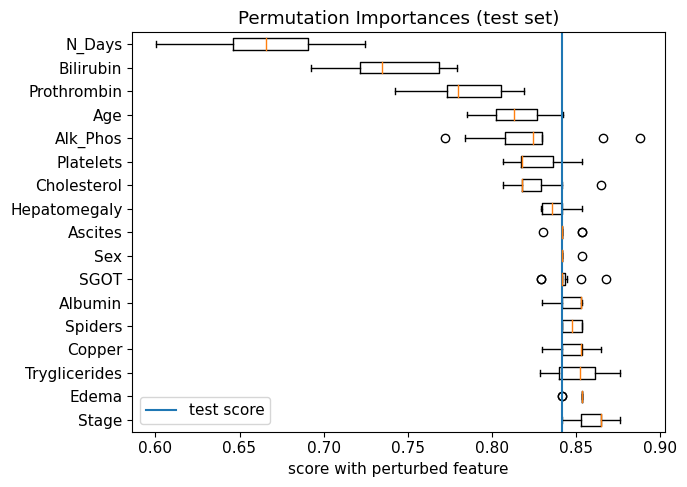

In [101]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(7,5))
plt.boxplot(scores[sorted_indcs].T,labels=X.columns[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

#issue is that they are all correlated

In [110]:
def StratKFoldF1_scaled(X, y, ML_Algo, param_grid):
    '''Main function that can be used to train our models, 
    -- preprocesses with StratifiedKFold, 
    -- CV is GridSearchCV
    -- F1 Score as evaluation metric
    '''
    nr_states = 5
    test_scores = []
    final_models = []
    for j in range(20):
        categorical_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
                ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

        # ordinal encoder
        #Make the missing values categories
        ordinal_transformer = Pipeline(steps=[
            ('imputer2', SimpleImputer(missing_values=np.nan, strategy='constant')),
            ('ordinal', OrdinalEncoder(categories= ordinal_cats, handle_unknown='use_encoded_value', unknown_value=np.nan))

            ])

        # standard scaler
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler()), 
            ('imperative', IterativeImputer(estimator = RandomForestRegressor(n_estimators=1, random_state=random_state), max_iter=j, random_state=random_state))])


        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, std_ftrs),
                ('cat', categorical_transformer, onehot_ftrs),
                ('ord', ordinal_transformer, ordinal_ftrs)])
        for i in range(nr_states):
            # first split to separate out the test set
            X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

            # StratifiedKFold to split  other
            kf = StratifiedKFold(n_splits=6,shuffle=True,random_state=42*i)

            #Scale again
            scale = StandardScaler()

            #Under the hood pipeline
            pipe = make_pipeline(preprocessor,scale, ML_Algo)

            #GridSearchCV with StratifiedKFold and f1 as scoring
            grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'f1_weighted',
                                cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
            
            # this line actually fits the model on other
            grid.fit(X_other, y_other) # The key line where everything is happening that we wrote out code for above
            # save results into a data frame. feel free to print it and inspect it
            results = pd.DataFrame(grid.cv_results_)
            #print(results)

            print('best model parameters:',grid.best_params_)
            print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
            # save the model
            final_models.append(grid)
            # calculate and save the test score
            y_test_pred = final_models[-1].predict(X_test)
            test_scores.append(f1_score(y_test,y_test_pred, average='weighted'))
            # test_scores[i] = f1_score(y_test,y_test_pred, average='weighted')
            print('test score:',test_scores[i])
        return test_scores, final_models

param_grid = {
              'randomforestclassifier__max_depth': [1, 5, 10, 15, 20], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1] # linearly spaced between 0.5 and 1
              } 

clf = RandomForestClassifier(random_state=42)

rf_test_scores, rf_final_models = StratKFoldF1_scaled(X, y, clf, param_grid)

print('list of test scores:', rf_test_scores)
print('The mean of the test scores is:', np.mean(rf_test_scores))
print('The standard deviation of the test scores is:', np.std(rf_test_scores))

Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.7}
validation score: 0.7600843998177513
test score: 0.7176204819277109
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 0.9}
validation score: 0.7296474069949377
test score: 0.8419596754364396
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.768432338856463
test score: 0.6848334514528701
Fitting 6 folds for each of 30 candidates, totalling 180 fits
best model parameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.9}
validation score: 0.7539376243708955
test score: 0.7435751261635938
Fitting 6 folds for each of 30 candidates

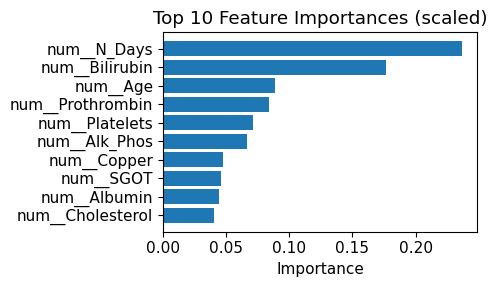

In [112]:
model = rf_final_models[1]
feature_names = np.array(feature_names)
# print('test score:',model.score(X_test,y_test))
# print(model.best_estimator_[-1].feature_importances_)
feature_importances = model.best_estimator_[-1].feature_importances_
sorted_indcs = np.argsort(np.abs(feature_importances))

plt.figure(figsize=(5, 3))
plt.rcParams.update({'font.size': 11})
plt.barh(np.arange(10), feature_importances[sorted_indcs[-10:]])
plt.yticks(np.arange(10), feature_names[sorted_indcs[-10:]])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (scaled)')
plt.tight_layout()
plt.show()

In [116]:
#Local Feature Importance
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(model.best_estimator_[1])
# transform the test set
X_test_transformed = model.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 50 points in the test
shap_values = explainer.shap_values(X_test_transformed[:50])
print(np.shape(shap_values))

(83, 26)
(3, 50, 26)


In [136]:
#Class 0 is C, 1 and 2 are more severe outcomes
index = 9 # the index of the point to explain  #good ones are 10, 9, and 21
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

#This gets you the probability that the point falls into class 1! Pushed toward predicted probability (here 0.03). Huge for job
#Confident that they earn over 50k
#.76 is base prediction probability

0.5296656534954408


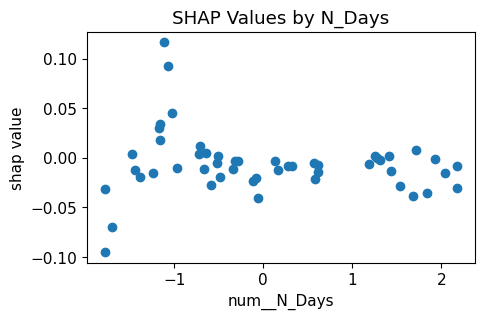

['N_Days' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders' 'Edema'
 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin' 'Stage']


In [119]:
matplotlib.rcParams.update({'font.size': 11})
ftr = 'num__N_Days'
indx = np.argwhere(feature_names==ftr)
plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:50,indx],shap_values[1][:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.title('SHAP Values by N_Days')
plt.show()

print(model.feature_names_in_)

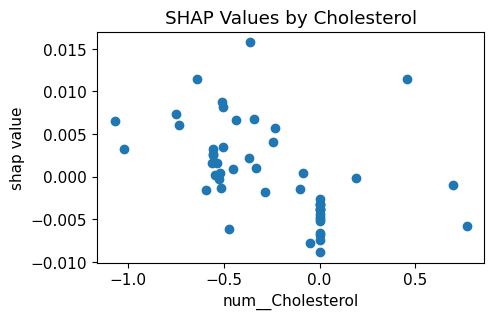

['N_Days' 'Age' 'Sex' 'Ascites' 'Hepatomegaly' 'Spiders' 'Edema'
 'Bilirubin' 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT'
 'Tryglicerides' 'Platelets' 'Prothrombin' 'Stage']


In [120]:
matplotlib.rcParams.update({'font.size': 11})
ftr = 'num__Cholesterol'
indx = np.argwhere(feature_names==ftr)
plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:50,indx],shap_values[1][:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.title('SHAP Values by Cholesterol')
plt.show()

print(model.feature_names_in_)

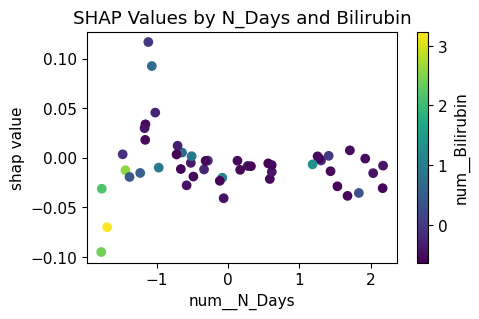

In [122]:
ftr1 = 'num__N_Days'
ftr2 = 'num__Bilirubin'
indx1 = np.argwhere(feature_names==ftr1)
indx2 = np.argwhere(feature_names==ftr2)

plt.figure(figsize=(5,3))
plt.scatter(X_test_transformed[:50,indx1],shap_values[1][:,indx1],c=X_test_transformed[:50,indx2])
plt.ylabel('shap value')
plt.xlabel(ftr1)
plt.colorbar(label=ftr2)
plt.title('SHAP Values by N_Days and Bilirubin')
plt.show()

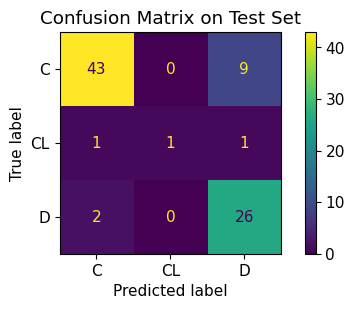

In [123]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confusion Matrix
# Predict on the test set

y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm,display_labels=['C', 'CL', 'D'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.title('Confusion Matrix on Test Set')
plt.show()

#Calculate all the metrics

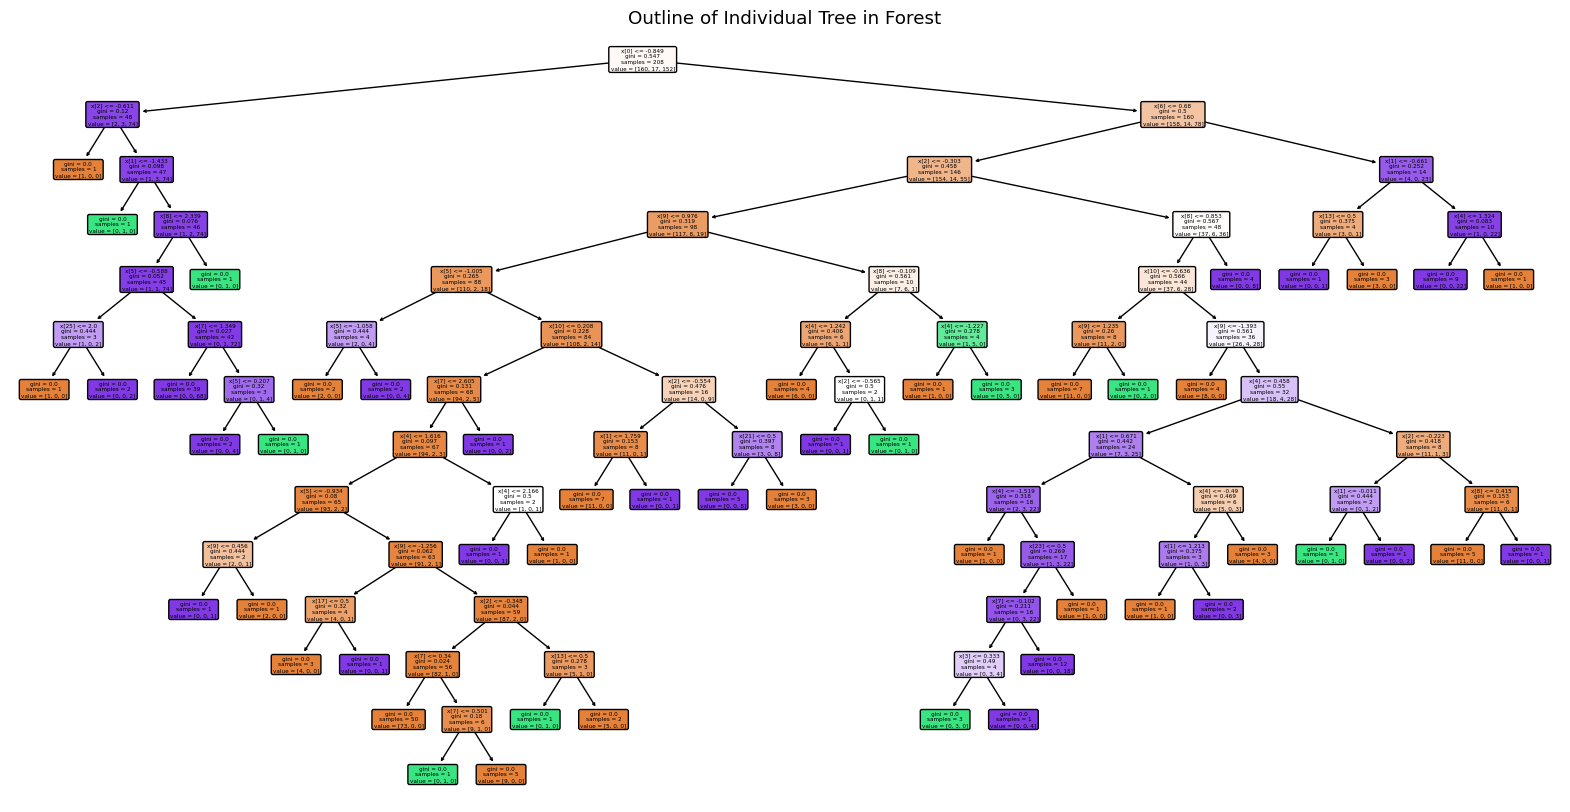

In [126]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model.best_estimator_[-1].estimators_[0], filled=True, rounded=True)
plt.title('Outline of Individual Tree in Forest')
plt.show()


In [125]:
# Plot decision boundaries
plt.figure(figsize=(10, 6))

# Generate a grid of points
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Use the classifier to predict the classes for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour plot of decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundaries (Multiclass)')
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x600 with 0 Axes>

### Questions
- Generally check that the results look okay
    - Have to make sure results are reproduceable?

- Getting f1 score to work:
    - Wanna use weighted cuz classification is imbalanced
    - works for accuracy score!
    - how do I get this to work with f1 given multiclass


- ASK: Inspect your model (e.g., confusion matrix, scatter plot of the true vs predicted values in regression, global/local feature importances).
    - A single model for each? The best model? Generally just check i'm training right amount of models
        - Look at how to determine which final model to select. Just select model that corresponds to highest score?
    - Should it be 5 baseline scores for the 5 random states?
    - ARE AVERAGE AND STDT SCORES OR WITHIN EACH RANDOM STATE FOR EACH FOLD?

- help with the convergence warnings

- Zipping my models

### TO DO
- Inspect your model (e.g., confusion matrix, scatter plot of the true vs predicted values in regression, global/local feature importances)
    - Gonna need to study coefficients of LogReg by scaling again
- Describe what steps you took to make your model interpretable. What did you learn?
- Model Table (CV)
- Reevaluate the param_grids and probably retrain
- CHECK EVERYTHING AND ASK QUESTIONS

### Choices
- StraifiedKFold
- Multivar Imputation (Reduced Features Model)
- Accuracy Score (f1 score)
- Global feature importance metrics vs. permutation feature importance (too much correlation)
    - Could even use SHAP